In [1]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Loading dataset

In [2]:
%time df = pd.read_csv(r'../input/dataset-for-timeseries/XTX_data.csv')
print(df.shape)
df.head()

CPU times: user 24.3 s, sys: 4.05 s, total: 28.3 s
Wall time: 38.4 s
(2999999, 61)


,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5


## 2. EDA [Explotary data analysis]
### 2.1. Counting then filling missing values.

In [3]:
x_na = np.nan   ## the NaN values is stored as an nan in numpy.
na_df = df.dropna()
na_df_count = df.shape[0] - df.iloc[:, :-1][~(df.iloc[:, :-1] == x_na)].count()
print('For all features, there are %s missing values in the whole dataframe'%(df.shape[0] - na_df.shape[0]))

print('For each feature in this dataset: ')

print('- The column that has the most missing_values is %s and there are %s NAN_values'%
      (na_df_count[na_df_count != 0].idxmax(), na_df_count[na_df_count != 0].max()))

print('- The column that has the least number of missing_values is %s and there are %s NAN_values'%
      (na_df_count[na_df_count != 0].idxmin(), na_df_count[na_df_count != 0].min()))

print('- Detailed of missing values at each features (which exists NAN_values):')
na_df_count[na_df_count != 0]

For all features, there are 451 missing values in the whole dataframe
For each feature in this dataset: 
- The column that has the most missing_values is askRate14 and there are 451 NAN_values
- The column that has the least number of missing_values is askRate1 and there are 36 NAN_values
- Detailed of missing values at each features (which exists NAN_values):


askRate1      36
askRate2      64
askRate3      97
askRate4     138
askRate5     173
askRate6     207
askRate7     238
askRate8     265
askRate9     291
askRate10    325
askRate11    360
askRate12    394
askRate13    429
askRate14    451
askSize1      36
askSize2      64
askSize3      97
askSize4     138
askSize5     173
askSize6     207
askSize7     238
askSize8     265
askSize9     291
askSize10    325
askSize11    360
askSize12    394
askSize13    429
askSize14    451
dtype: int64

#### Comment
- So, all the missing_value comes from 2 groups **`askRate`** and **`askSize`** because we always obtain the information of **`bidRate`** and **`bidSize`**.
- Almost the missing_values comes from the `starting_times` of the observations at 2 groups **`askRate`** and **`askSize`**.

Now, we fill all the missing values equal to 0.

In [4]:
%time df_non_na = df.fillna(0)
df_non_na.head()

CPU times: user 697 ms, sys: 447 ms, total: 1.14 s
Wall time: 1.14 s


,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5


### 2.2. Droping duplicates

In [5]:
df_non_na['y'] = df_non_na[['y']].cumsum()
%time df_nd = df_non_na.drop_duplicates()

print(df_nd.shape)
df_nd.head()

CPU times: user 5.29 s, sys: 1.15 s, total: 6.44 s
Wall time: 6.45 s
(2927843, 61)


,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-1.0
2,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-1.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-2.0
4,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-2.5


### 2.3. Normalizing dataset

In [6]:
## 1. Normalizing
def normalized(data):
    data -= data.mean(axis = 0)
    data /= data.std(axis = 0)
    return data
%time scale_df = normalized(df_nd)
## 2. Find the corr_matrix
%time corr = scale_df.corr()

CPU times: user 1.93 s, sys: 1.53 s, total: 3.46 s
Wall time: 1.55 s
CPU times: user 30 s, sys: 293 ms, total: 30.3 s
Wall time: 30.3 s


In [7]:
corr

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
askRate0,1.000000,0.977465,0.961511,0.942898,0.921568,0.904437,0.888542,0.874694,0.863271,0.852603,...,-0.177290,-0.176217,-0.185229,-0.170511,-0.191691,-0.184031,-0.197009,-0.193616,-0.193441,0.995961
askRate1,0.977465,1.000000,0.983680,0.964640,0.942804,0.925273,0.909002,0.894834,0.883146,0.872229,...,-0.173874,-0.172331,-0.181545,-0.166828,-0.188172,-0.180167,-0.192624,-0.189123,-0.189104,0.973549
askRate2,0.961511,0.983680,1.000000,0.980651,0.958438,0.940607,0.924056,0.909651,0.897766,0.886669,...,-0.171208,-0.169611,-0.178677,-0.164111,-0.185431,-0.177485,-0.189539,-0.185965,-0.185992,0.957700
askRate3,0.942898,0.964640,0.980651,1.000000,0.977346,0.959166,0.942293,0.927609,0.915491,0.904182,...,-0.168105,-0.166598,-0.175274,-0.160959,-0.181942,-0.174297,-0.185987,-0.182293,-0.182508,0.939223
askRate4,0.921568,0.942804,0.958438,0.977346,1.000000,0.981406,0.964151,0.949140,0.936748,0.925185,...,-0.164862,-0.162897,-0.171441,-0.157495,-0.179233,-0.170476,-0.181715,-0.177906,-0.178511,0.918002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bidSize11,-0.184031,-0.180167,-0.177485,-0.174297,-0.170476,-0.167529,-0.164925,-0.162548,-0.160635,-0.158764,...,0.025861,0.235432,0.023532,0.268852,0.028288,1.000000,0.034879,0.261300,0.033165,-0.173876
bidSize12,-0.197009,-0.192624,-0.189539,-0.185987,-0.181715,-0.178523,-0.175419,-0.172626,-0.170562,-0.168547,...,0.258603,0.060065,0.225050,0.045079,0.248295,0.034879,1.000000,0.028252,0.218525,-0.186062
bidSize13,-0.193616,-0.189123,-0.185965,-0.182293,-0.177906,-0.174443,-0.171224,-0.168497,-0.166120,-0.164017,...,0.037557,0.224774,0.049730,0.222428,0.045461,0.261300,0.028252,1.000000,0.026368,-0.182826
bidSize14,-0.193441,-0.189104,-0.185992,-0.182508,-0.178511,-0.175424,-0.172381,-0.169757,-0.167610,-0.165558,...,0.170136,0.058174,0.204294,0.037613,0.199903,0.033165,0.218525,0.026368,1.000000,-0.182415


## 2.4. Another visualization.
### 2.4.1. Histograms
#### A. Target $y$

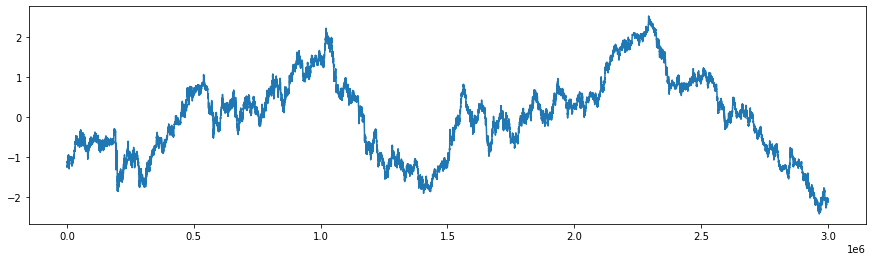

In [8]:
plt.figure(figsize = (15, 4))
target = scale_df['y']
target.plot();

#### B. For another features.

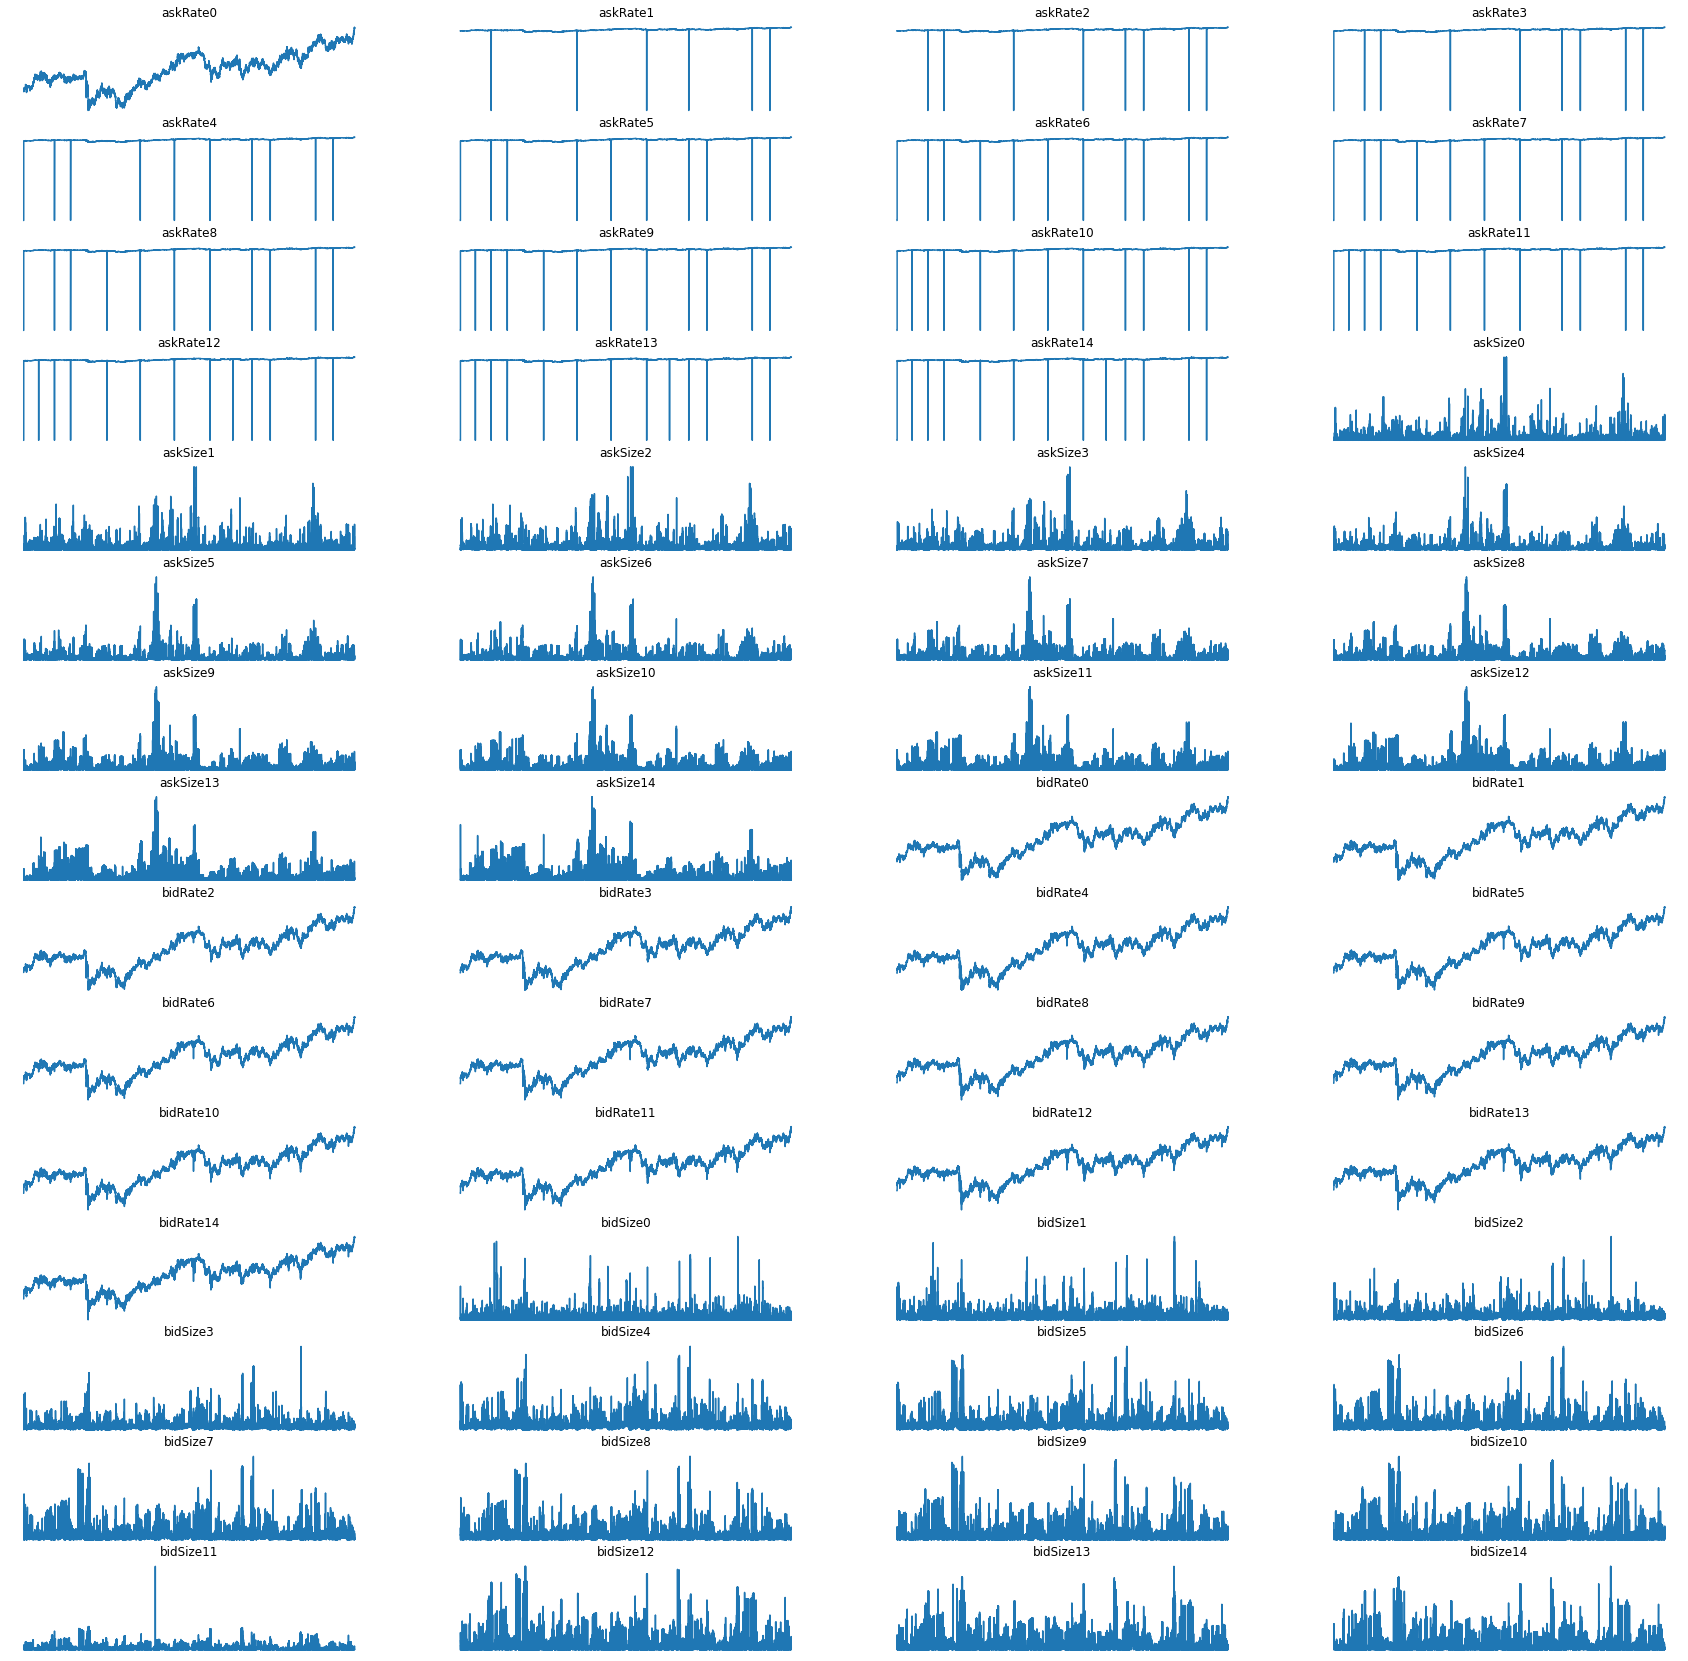

In [9]:
fig, ax = plt.subplots(nrows = 15, ncols = 4, figsize = (30, 30))
ax = ax.ravel()
for k in range(60):
    scale_df.iloc[:1000000, k].plot(ax = ax[k]) 
    ax[k].set_title(scale_df.columns[k])
    ax[k].axis("off")

### 2.4.2. Quantitative Attributes
Using histogram

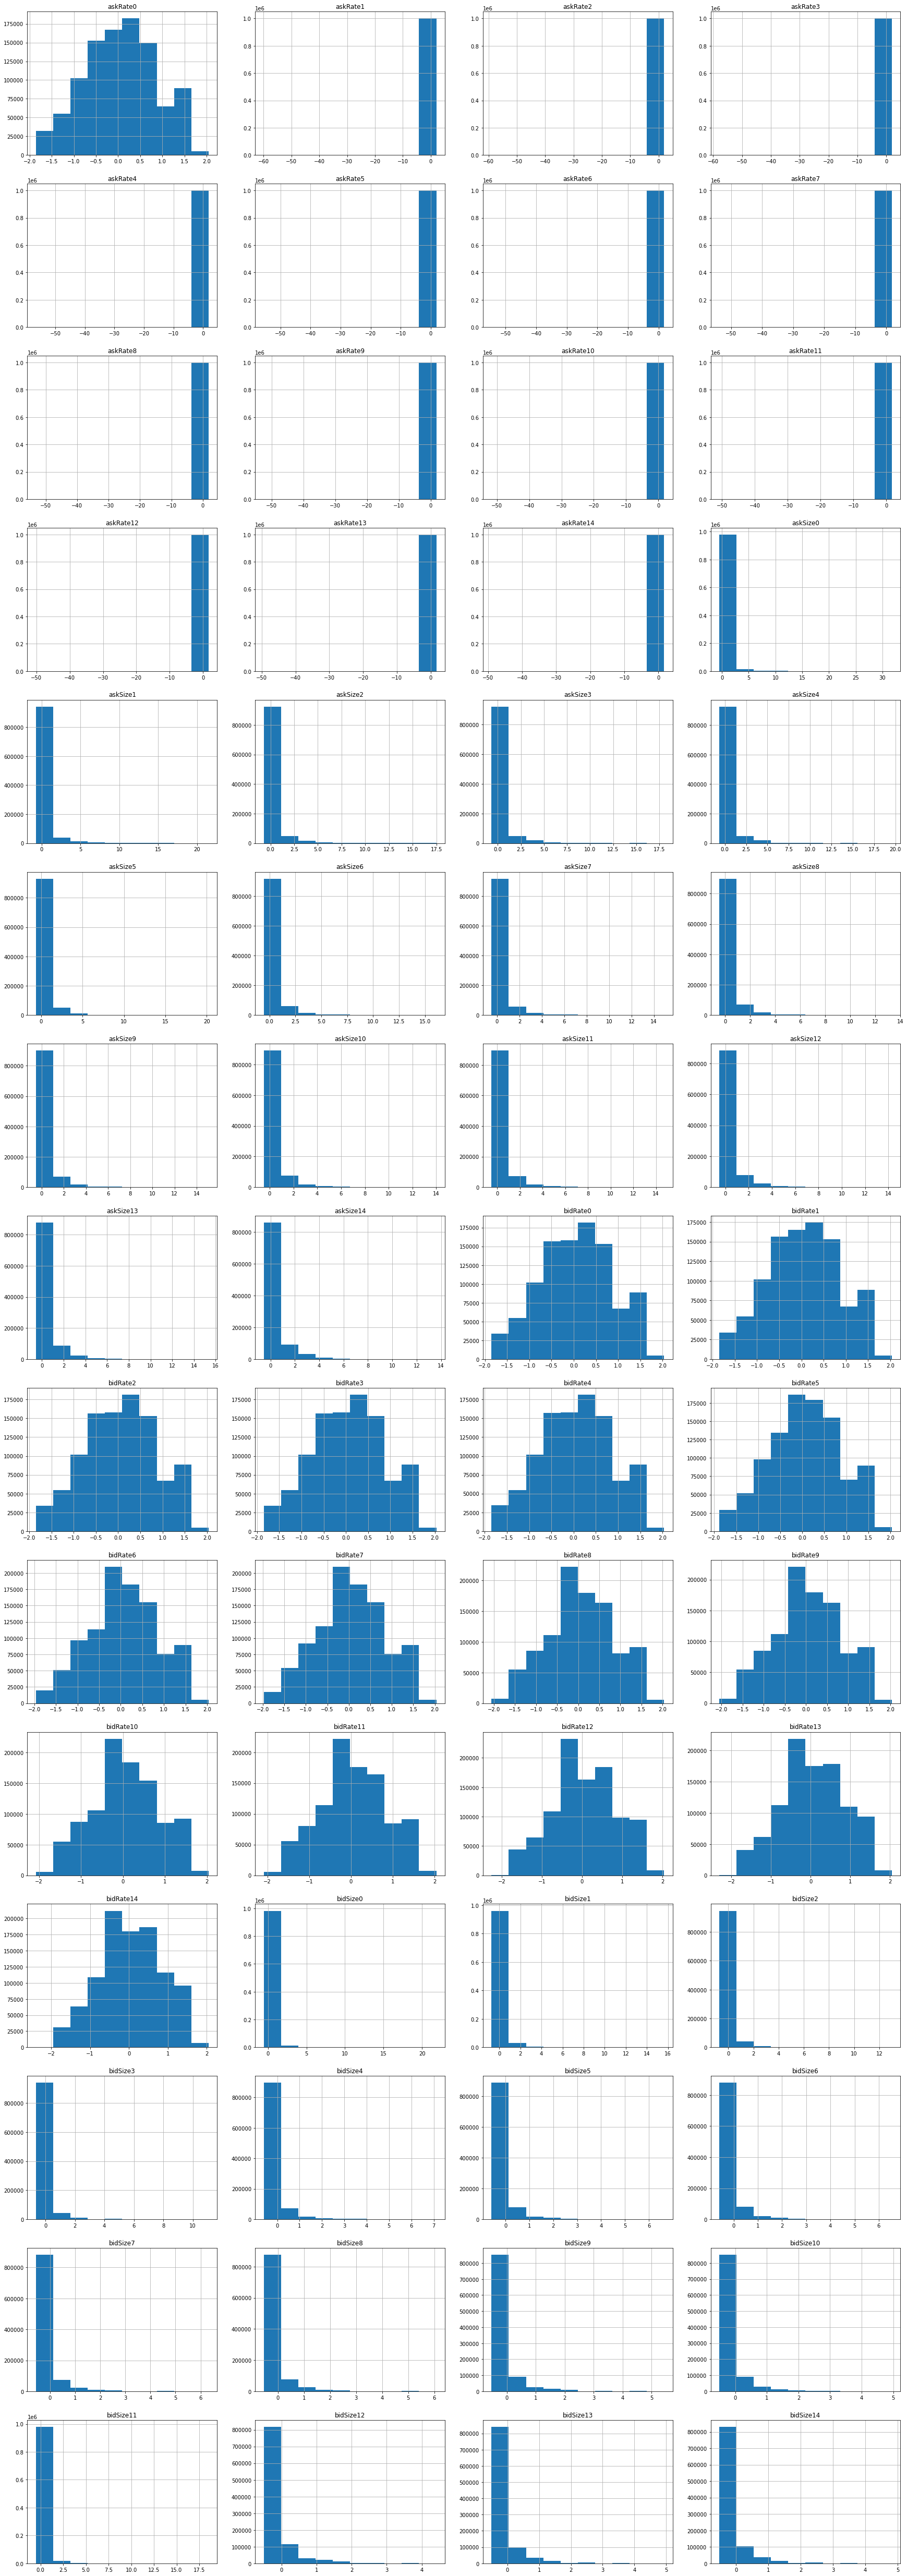

In [10]:
fig, ax = plt.subplots(nrows = 15, ncols = 4, figsize = (30, 90))
ax = ax.ravel()
for k in range(60):
    scale_df.iloc[:1000000, k].hist(ax = ax[k]) 
    ax[k].set_title(scale_df.columns[k])

Using scatter plot : feature_k, y

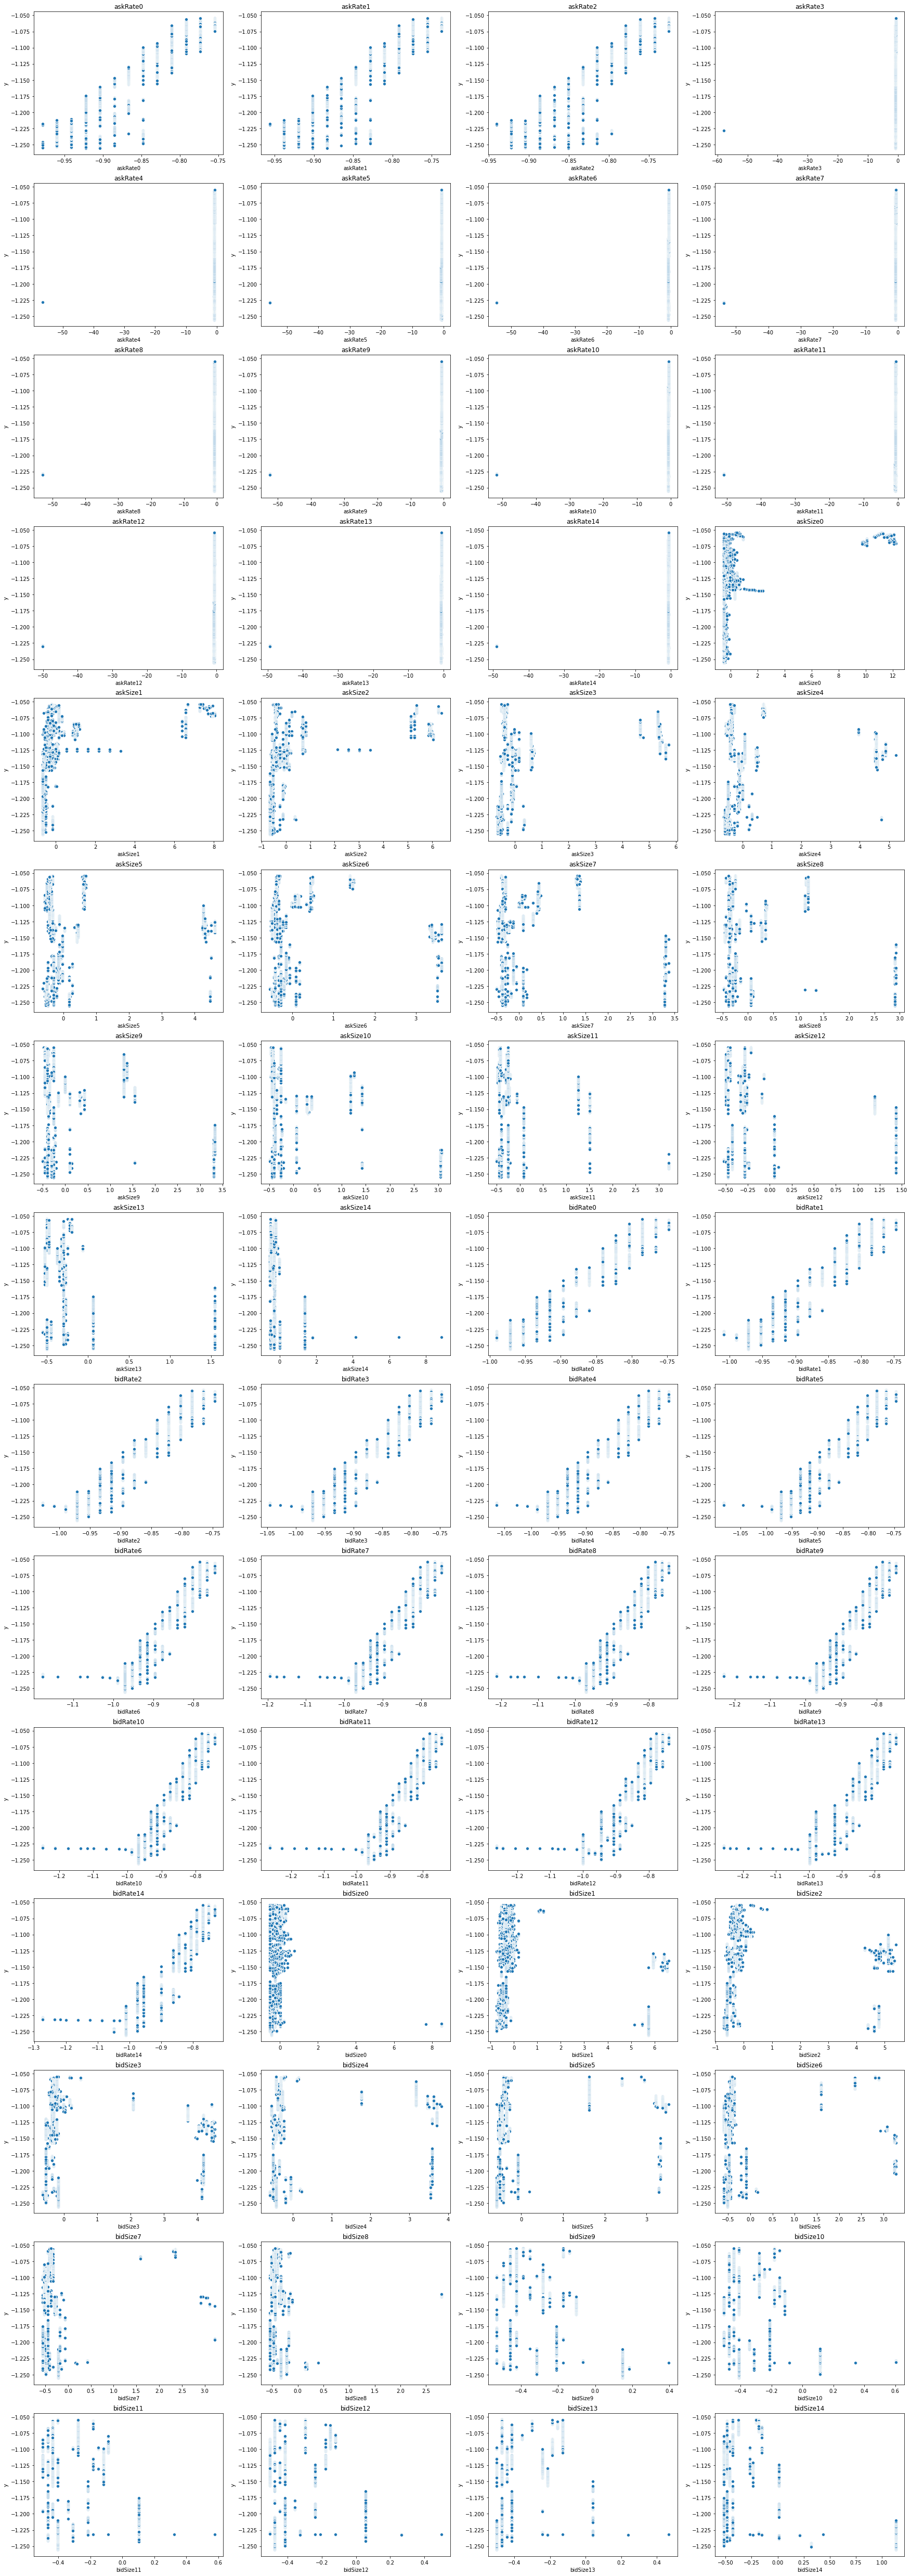

In [11]:
fig, ax = plt.subplots(nrows = 15, ncols = 4, figsize = (30, 90))
ax = ax.ravel()
for k in range(60):
    sns.scatterplot(x = scale_df.columns[k], y = 'y', data = scale_df[:5000], ax = ax[k]) 
    ax[k].set_title(scale_df.columns[k])

### 2.4.3. Qualitative Attributes or `outlier visualization`

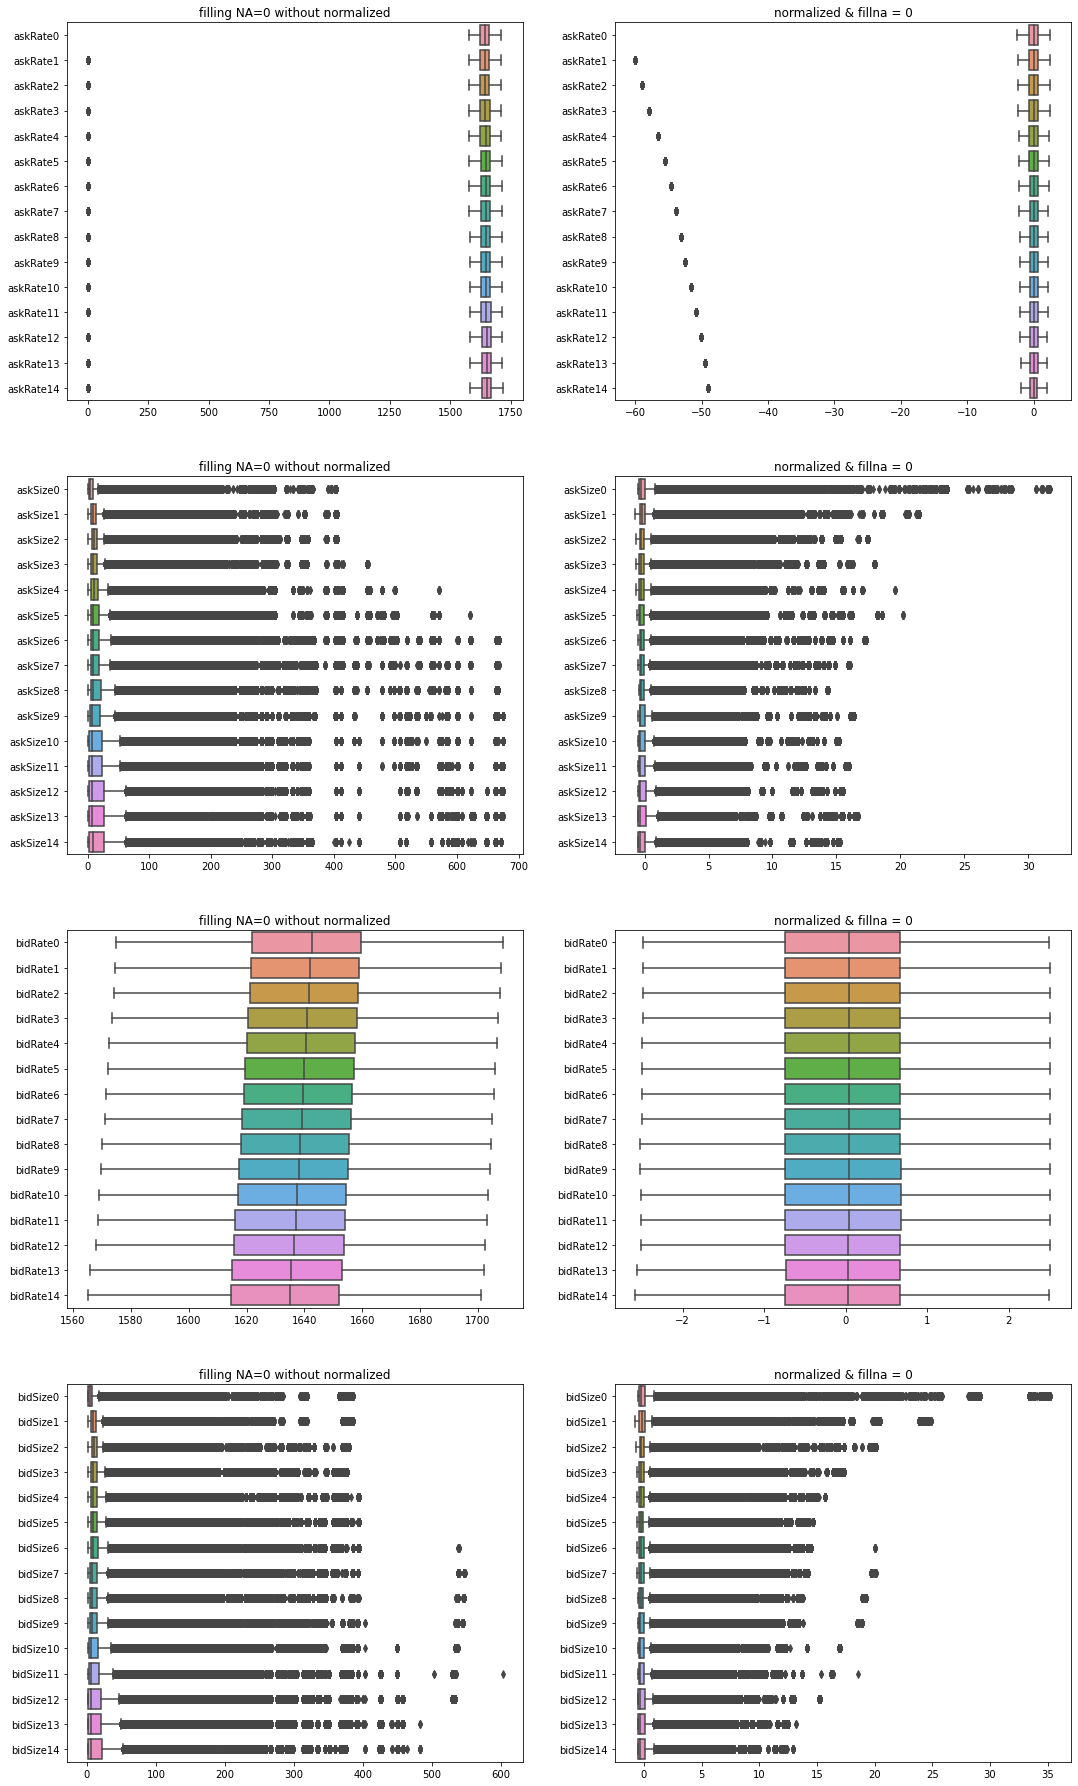

In [12]:
plt.subplots(4, 2, figsize = (18, 32))
for k in range(4):
    plt.subplot(4, 2, 2*k+1); 
    sns.boxplot(data = df_non_na.iloc[:, 15*k:15*(k+1)], orient = 'h'), 
    plt.title('filling NA=0 without normalized')
    
    plt.subplot(4, 2, 2*k+2); 
    sns.boxplot(data = scale_df.iloc[:, 15*k:15*(k+1)], orient = 'h'), 
    plt.title('normalized & fillna = 0');

#### Comments.

### 2.4.4. Correlation.
The correlation_coefs of all features and the target is equivalent to using scatterplot at 2.4.2

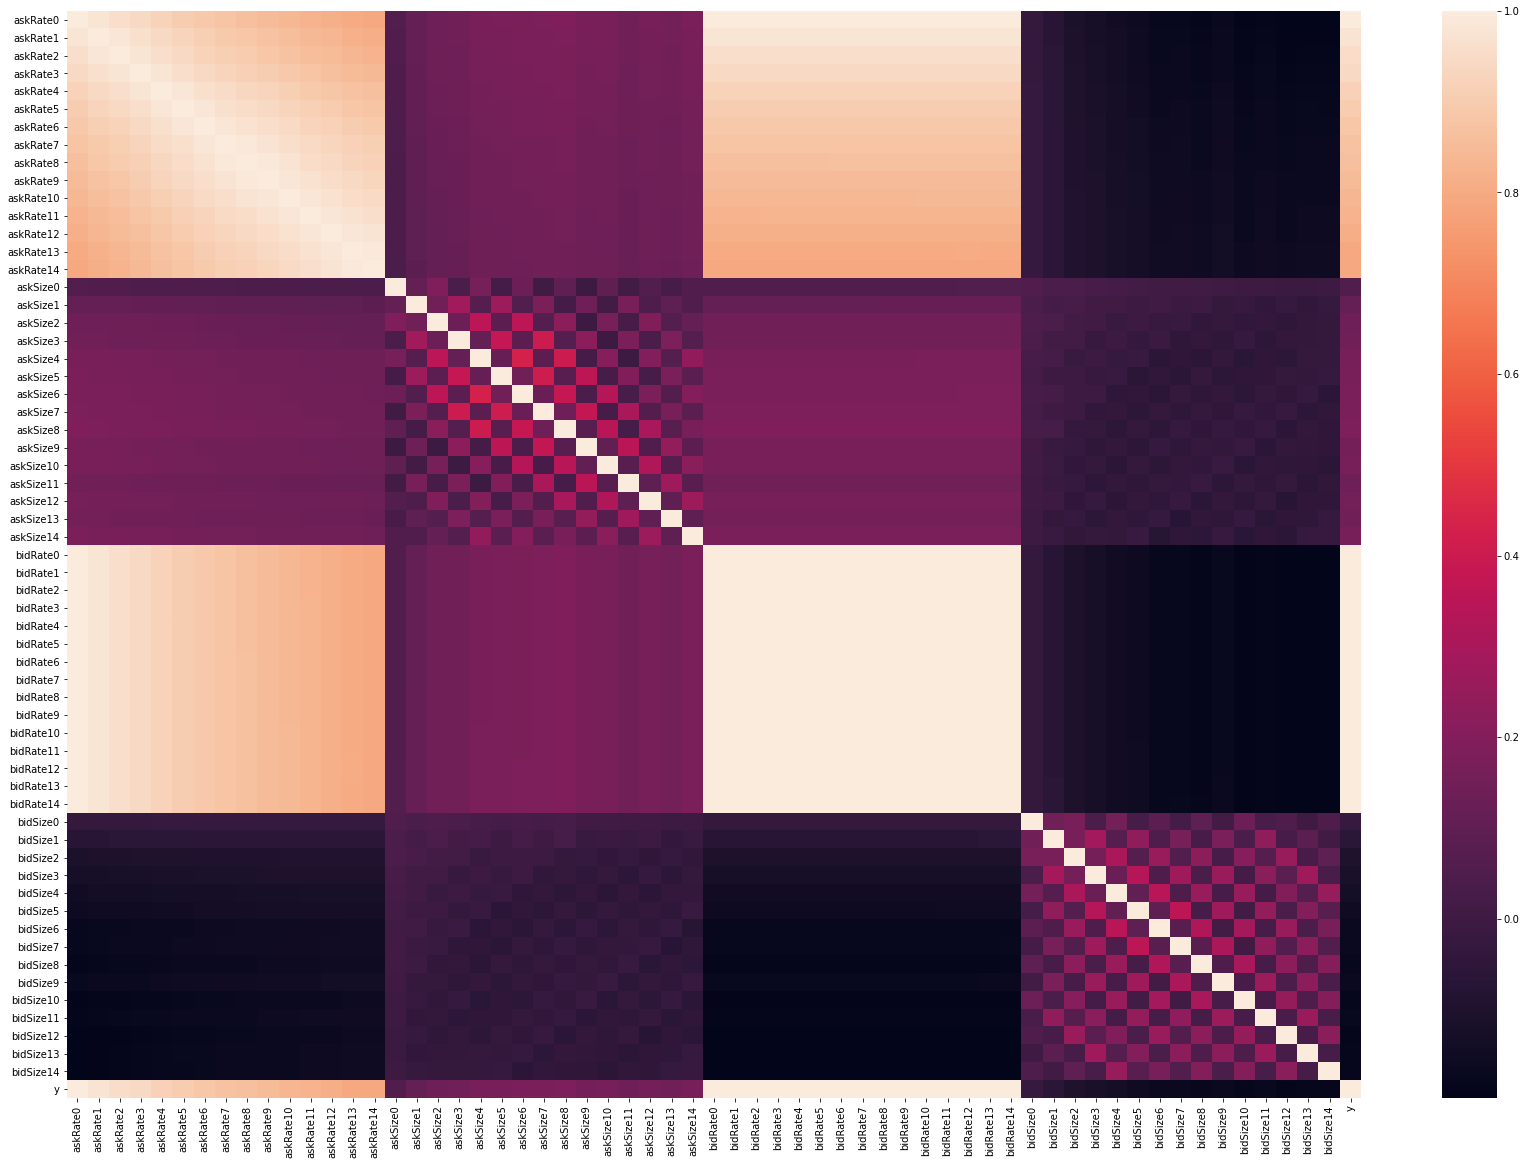

In [13]:
import seaborn as sns
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (29, 20))
sns.heatmap(corr, ax = ax)